<a href="https://colab.research.google.com/github/life-ofpi/2023_SDA/blob/main/SDA_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

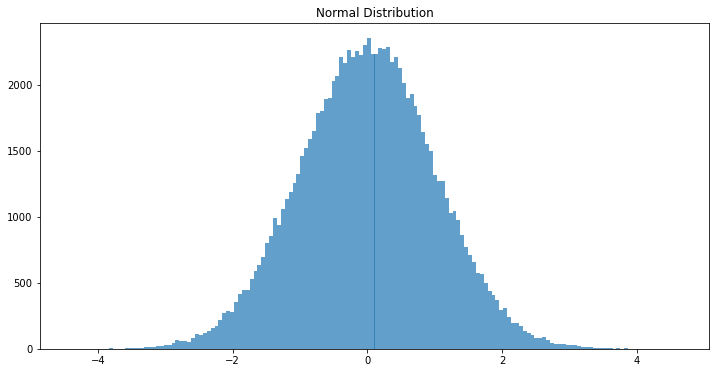

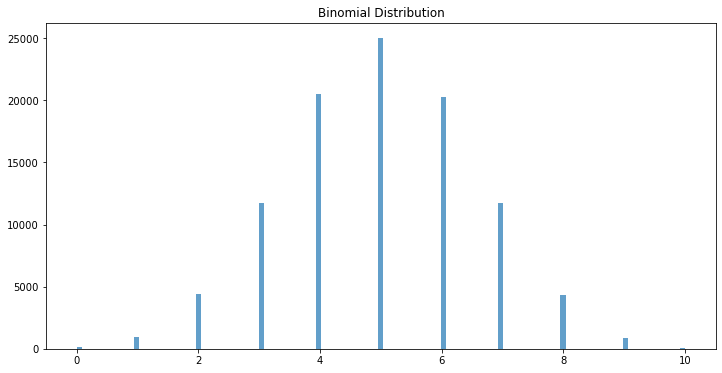

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#정규분포
sample=np.random.normal(loc=0.0, scale=1.0, size=100000)

#이항분포
bionm_sample=np.random.binomial(n=10,p=0.5,size=100000)

# 정규분포의 히스토그램 그리기
plt.figure(figsize=(12, 6))
plt.hist(sample, bins='auto', alpha=0.7)
plt.title('Normal Distribution')
plt.show()

# 이항분포의 히스토그램 그리기
plt.figure(figsize=(12, 6))
plt.hist(bionm_sample, bins='auto', alpha=0.7)
plt.title('Binomial Distribution')
plt.show()


각 sample data로부터 아래의 통계량을 계산하는 코드를 내부 함수 or vectorize를 사용하여 / 사용하지 않고 각각 작
성하고 실행 소요 시간을 비교 (20)
– Mean / Median / Variance / MAD / Skewness / Kurtosis / IQR
– Jupyter cell의 실행 시간 띄우는 법 찾아볼 것

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

data = np.arange(1, 10001)

#내부함수 사용

print("내부함수 사용 \nMean:")
%timeit -r1 -n1 print(np.mean(data))

print("\nMedian:")
%timeit -r1 -n1 print(np.median(data))

print("\nVariance:")
%timeit -r1 -n1 print(np.var(data))

print("\nMAD:")
%timeit -r1 -n1 print((pd.Series(data) - pd.Series(data).mean()).abs().mean())

print("\nSkewness:")
%timeit -r1 -n1 print(stats.skew(data))

print("\nKurtosis:")
%timeit -r1 -n1 print(stats.kurtosis(data))

print("\nIQR:")
%timeit -r1 -n1 print(stats.iqr(data))


#내부함수 사용 X
def calc_mean(data):
    total = 0
    count = 0
    for x in data:
        total += x
        count += 1
    return total/count

def calc_median(data):
    data2 = list(data)
    data2.sort()
    n = len(data2)
    if n % 2 == 0:
        return (data2[n//2 - 1] + data2[n//2]) / 2.0
    else:
        return data2[n//2]

def calc_variance(data):
    mean=calc_mean(data)
    total = 0
    for x in data:
        total += (x-mean)**2
    variance=total/len(data)
    return variance

def calc_mad(data):
    median=calc_median(data)
    minus=[abs(x-median) for x in data]
    mad=calc_median(minus)
    return mad

def calc_skewness(data):
     # Skewness
    mean=calc_mean(data)
    variance=calc_variance(data)
    total = 0
    for x in data:
        total += (x - mean) ** 3
    skewness = total / len(data) / (variance ** 1.5)
    return skewness

def calc_kurtosis(data):
     # Kurtosis
    mean=calc_mean(data)
    variance=calc_variance(data)
    kurtosis=sum((xi-mean)**4 for xi in data)/len(data)/(np.std(data)**4 )-3
    total = 0
    for x in data:
        total += (x - mean) ** 4
    kurtosis = total / len(data) / (variance ** 2 ) - 3
    return kurtosis

def calc_iqr(data):
     # IQR
        data_sort=list(sorted(list(map(float,data))))
        quartile_1=int(len(data_sort)*.25)
        quartile_3=int(len(data_sort)*.75)
        iqr=float(data_sort[quartile_3])-float(data_sort[quartile_1])

        return iqr



print("\n내부함수 사용X \nMean:")
%timeit -r1 -n1 print("값:",calc_mean(data))

print("\nMedian:")
%timeit -r1 -n1 print("값:",calc_median(data))

print("\nVariance:")
%timeit -r1 -n1 print("값:",calc_variance(data))

print("\nMad:")
%timeit -r1 -n1 print("값:",calc_mad(data))

print("\nSkewness:")
%timeit -r1 -n1 print("값:",calc_skewness(data))

print("\nKurtosis:")
%timeit -r1 -n1 print("값:", calc_kurtosis(data))
print("\nIQR:")
%timeit -r1 -n1 print("값:", calc_iqr(data))

#내부함수를 사용하는것이 더 빠르다.

내부함수 사용 
Mean:
5000.5
420 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

Median:
5000.5
645 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

Variance:
8333333.25
172 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

MAD:
2500.0
1.33 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

Skewness:
0.0
1.49 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

Kurtosis:
-1.2000000240000006
531 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

IQR:
4999.5
447 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

내부함수 사용X 
Mean:
값: 5000.5
1.01 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

Median:
값: 5000.5
936 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

Variance:
값: 8333333.25
32.8 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

Mad:
값: 2500.0
27.6 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

Skewness:
값: 0.0
58.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 

In [ ]:
#시각화 실습2 강의자료의 21, 28 page
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
data=pd.read_csv("covid19_utf8.csv",parse_dates=["자치구 기준일"])
data.head()
data_220608=data.iloc[18:110][::-1]
data_220608

,자치구 기준일,종로구 전체,종로구 추가,중구 전체,중구 추가,용산구 전체,용산구 추가,성동구 전체,성동구 추가,광진구 전체,...,서초구 전체,서추구 추가,강남구 전체,강남구 추가,송파구 전체,송파구 추가,강동구 전체,강동구 추가,기타 전체,기타 추가
109,2022-06-01,48506,37,44042,28,73962,62,106338,84,127469,...,141686,130,183627,311,234701,146,165214,105,221857,186
108,2022-06-02,48530,24,44056,14,73995,33,106441,103,127519,...,141775,89,183844,217,234821,120,165296,82,221962,105
107,2022-06-03,48560,30,44077,21,74065,71,106629,188,127573,...,141891,116,183964,120,234960,139,165378,83,222103,141
106,2022-06-04,48592,32,44096,19,74172,107,106738,109,127648,...,142011,120,184107,143,235066,106,165454,76,222269,166
105,2022-06-05,48618,26,44127,31,74212,40,106797,59,127695,...,142083,72,184218,111,235194,128,165521,67,222359,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,2022-08-27,60604,183,54915,172,94288,314,130683,419,158105,...,179710,603,231603,741,294850,1009,205306,661,278070,955
21,2022-08-28,60746,142,55058,143,94541,253,131023,340,158591,...,180247,537,232243,640,295658,808,205914,608,278712,642
20,2022-08-29,60805,59,55116,58,94651,110,131163,140,158803,...,180527,280,232569,326,295994,336,206243,329,279081,369
19,2022-08-30,61082,280,55347,231,95075,425,131684,522,159451,...,181253,726,233682,1114,297397,1404,207162,921,280255,1156


In [ ]:
data_220608["월"]=pd.DatetimeIndex(data_220608['자치구 기준일']).month #월 column추가
data_220608

,자치구 기준일,종로구 전체,종로구 추가,중구 전체,중구 추가,용산구 전체,용산구 추가,성동구 전체,성동구 추가,광진구 전체,...,서추구 추가,강남구 전체,강남구 추가,송파구 전체,송파구 추가,강동구 전체,강동구 추가,기타 전체,기타 추가,월
109,2022-06-01,48506,37,44042,28,73962,62,106338,84,127469,...,130,183627,311,234701,146,165214,105,221857,186,6
108,2022-06-02,48530,24,44056,14,73995,33,106441,103,127519,...,89,183844,217,234821,120,165296,82,221962,105,6
107,2022-06-03,48560,30,44077,21,74065,71,106629,188,127573,...,116,183964,120,234960,139,165378,83,222103,141,6
106,2022-06-04,48592,32,44096,19,74172,107,106738,109,127648,...,120,184107,143,235066,106,165454,76,222269,166,6
105,2022-06-05,48618,26,44127,31,74212,40,106797,59,127695,...,72,184218,111,235194,128,165521,67,222359,90,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,2022-08-27,60604,183,54915,172,94288,314,130683,419,158105,...,603,231603,741,294850,1009,205306,661,278070,955,8
21,2022-08-28,60746,142,55058,143,94541,253,131023,340,158591,...,537,232243,640,295658,808,205914,608,278712,642,8
20,2022-08-29,60805,59,55116,58,94651,110,131163,140,158803,...,280,232569,326,295994,336,206243,329,279081,369,8
19,2022-08-30,61082,280,55347,231,95075,425,131684,522,159451,...,726,233682,1114,297397,1404,207162,921,280255,1156,8


In [ ]:
data_barplot_220608=pd.Series(data_220608.iloc[-1].values - data_220608.iloc[0].values,index=data_220608.columns)
data_barplot_220608= data_barplot_220608.loc[["종로구 전체","용산구 전체","관악구 전체","강남구 전체","성동구 전체","강북구 전체","송파구 전체"]]
ind = data_barplot_220608.index.values #지역구
val = data_barplot_220608.values
data_barplot_220608=pd.DataFrame({'지역구':ind, '확진자':val}) #새로운 데이터프레임 생성
data_barplot_220608

,지역구,확진자
0,종로구 전체,12669
1,용산구 전체,21406
2,관악구 전체,48189
3,강남구 전체,50807
4,성동구 전체,25750
5,강북구 전체,23602
6,송파구 전체,63679


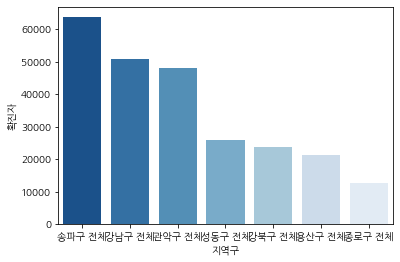

In [ ]:
#21p
mpl.rcParams["font.family"]="NanumGothic"
sns.barplot(x="지역구", y="확진자", data=data_barplot_220608,
            order=data_barplot_220608.groupby('지역구')['확진자'].sum().sort_values(ascending=False).index, palette="Blues_r")
plt.show()

In [ ]:
boxdata_220608=data_220608[['종로구 추가','강남구 추가','관악구 추가','용산구 추가','월']]
boxdata_220608 = boxdata_220608.rename(columns={
    '종로구 추가': '종로구',
    '강남구 추가': '강남구',
    '관악구 추가': '관악구',
    '용산구 추가': '용산구'
}) #'추가' 없앰

melted_data = boxdata_220608.melt(id_vars='월', var_name='지역구', value_name='확진자')
melted_data


,월,지역구,확진자
0,6,종로구,37
1,6,종로구,24
2,6,종로구,30
3,6,종로구,32
4,6,종로구,26
...,...,...,...
363,8,용산구,314
364,8,용산구,253
365,8,용산구,110
366,8,용산구,425


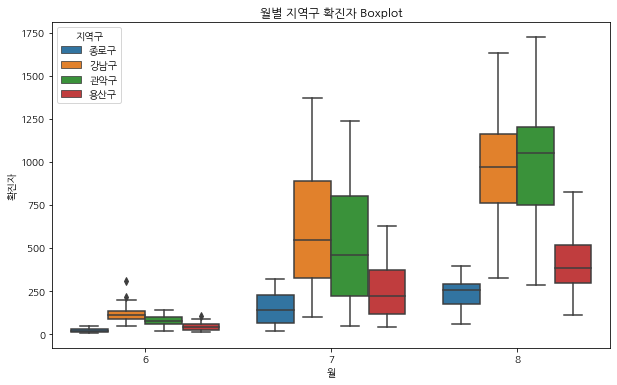

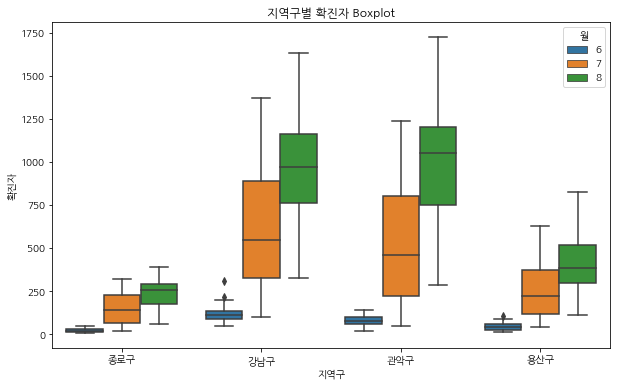

In [ ]:
# 월별 지역구 확진자 boxplot 그래프
#page 28
plt.figure(figsize=(10, 6))
sns.boxplot(x="월", y="확진자", hue="지역구", data=melted_data)
plt.title("월별 지역구 확진자 Boxplot")
plt.show()

# 지역구별 확진자 그래프
plt.figure(figsize=(10, 6))
sns.boxplot(x="지역구", y="확진자", hue='월',data=melted_data)
plt.title("지역구별 확진자 Boxplot")
plt.show()


In [ ]:
#데이터 전처리 강의자료 49page 실습7에 있는 3가지 질문에 대한 답을 코드와 plot과 본인 의견 작성 (50)

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
player=pd.read_csv("Players.csv")
player_data=pd.read_csv("player_data.csv")
salary_1718=pd.read_csv("NBA_season1718_salary.csv")
season_stats=pd.read_csv("Seasons_Stats.csv")
player_data

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University
...,...,...,...,...,...,...,...,...
4545,Ante Zizic,2018,2018,F-C,6-11,250.0,"January 4, 1997",NaN
4546,Jim Zoet,1983,1983,C,7-1,240.0,"December 20, 1953",Kent State University
4547,Bill Zopf,1971,1971,G,6-1,170.0,"June 7, 1948",Duquesne University
4548,Ivica Zubac,2017,2018,C,7-1,265.0,"March 18, 1997",NaN


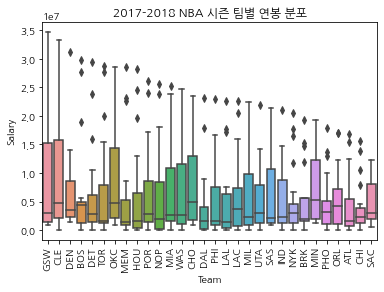

In [ ]:
#팀별로 salary분포
sns.boxplot(x="Tm", y="season17_18", data=salary_1718)
plt.title("2017-2018 NBA 시즌 팀별 연봉 분포")
plt.xlabel("Team")
plt.ylabel("Salary")
plt.xticks(rotation=90)
plt.show()


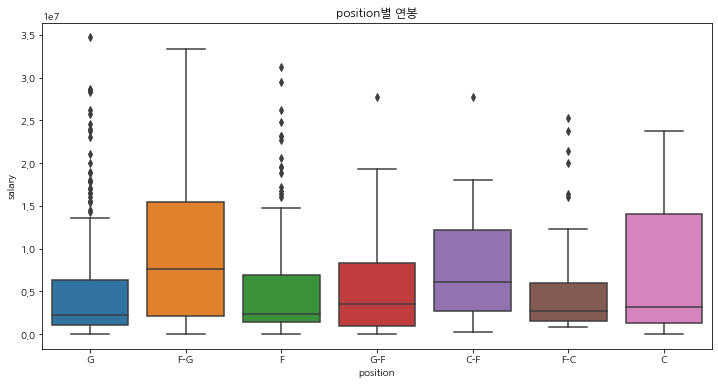

In [ ]:
#포지션과 salary의 상관 관계가 있을까?
salary = salary_1718[["Player", "season17_18"]]
position = player_data[["name", "position"]]

#공통된 player로 merge
merge_df = pd.merge(salary, position, left_on="Player", right_on="name", how="inner")
#scatter plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=merge_df, x="position", y="season17_18")
plt.title("position별 연봉")
plt.xlabel("position")
plt.ylabel("salary")
plt.show()


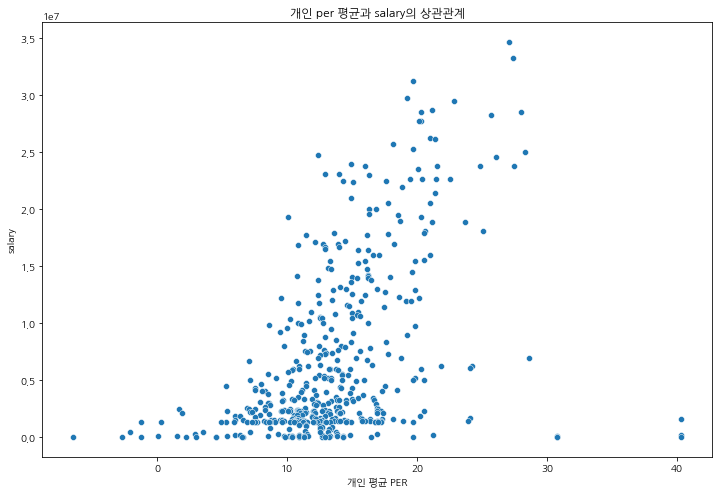

In [ ]:
#2014~2017 개인 PER 평균과 salary간의 상관관계
salary_data = salary_1718[["Player", "season17_18"]]
per_data = season_stats[["Player", "PER", "Year"]]

#per 평균 계산
avg_per = per_data[per_data["Year"].between(2014, 2017)].groupby("Player")["PER"].mean().reset_index()

merged_data = pd.merge(salary_data, avg_per, on="Player", how="inner")
#salary와 per간 corr
correlation = merged_data["season17_18"].corr(merged_data["PER"]) #상관관계


plt.figure(figsize=(12, 8))
sns.scatterplot(data=merged_data, x="PER", y="season17_18")
plt.title("개인 per 평균과 salary의 상관관계")
plt.xlabel("개인 평균 PER")
plt.ylabel("salary")
plt.show()

#약한 양의 상관관계